## V1

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Define the convolutional autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        
        # Encoder layers
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),  # Assuming grayscale images
            nn.ReLU(),
            nn.Conv2d(16, 8, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(8, 4, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        
        # Decoder layers
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(4, 8, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(8, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()  # Sigmoid activation to output pixel values in [0, 1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [13]:

# Load your dataset and preprocess if necessary
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image or numpy array to tensor
    transforms.Resize((32,32)),
])

# Example of loading MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Instantiate the model
model = Autoencoder()

# Define loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [14]:

# Training loop
num_epochs = 30
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, _ in train_loader:
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, images)  # Compute the loss
        
        # Backward pass and optimization
        optimizer.zero_grad()  # Zero gradients
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        
        running_loss += loss.item() * images.size(0)
    
    # Print average loss per epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader.dataset)}")


Epoch [1/30], Loss: 0.10183986931244532
Epoch [2/30], Loss: 0.1007771303097407
Epoch [3/30], Loss: 0.10077713034947713
Epoch [4/30], Loss: 0.1007771303097407
Epoch [5/30], Loss: 0.10077713067134221
Epoch [6/30], Loss: 0.10077713063160579
Epoch [7/30], Loss: 0.10077713046471277
Epoch [8/30], Loss: 0.10077713048458099
Epoch [9/30], Loss: 0.10077713056405385


KeyboardInterrupt: 

In [9]:
with torch.no_grad():
    for data in train_loader:
        img, _ = data
        # img = img.view(img.size(0), -1)
        # img = img.to(device)
        output = model(img)
        break


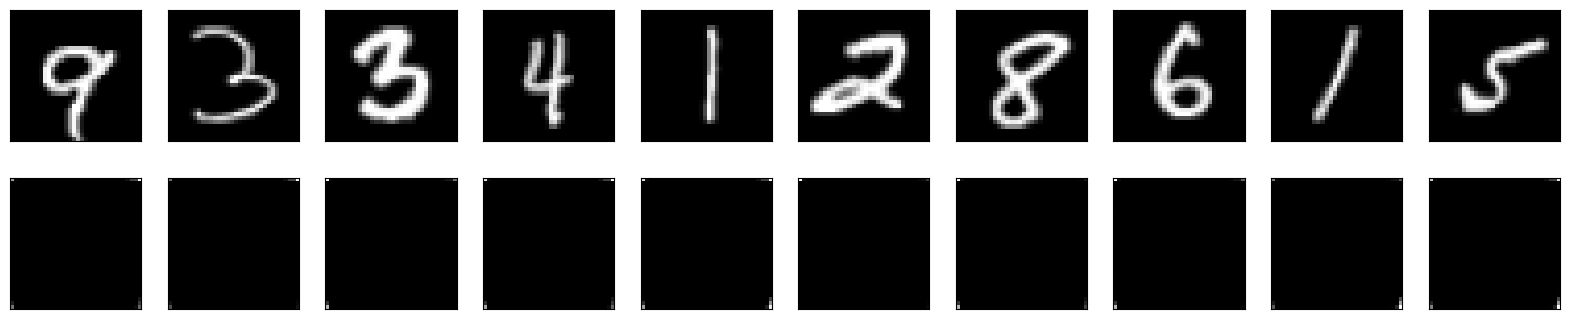

In [11]:

import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(img[i].cpu().numpy().reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(output[i].cpu().numpy().reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## V2

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Define the deeper convolutional autoencoder architecture with dense layers
class DeepAutoencoder(nn.Module):
    def __init__(self):
        super(DeepAutoencoder, self).__init__()
        
        # Encoder layers
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1),  # Assuming grayscale images
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(256*3*3, 512),  # Added dense layer
            nn.ReLU(),
            nn.Linear(512, 256)  # Added dense layer
        )
        
        # Decoder layers
        self.decoder = nn.Sequential(
            nn.Linear(256, 512),  # Added dense layer
            nn.ReLU(),
            nn.Linear(512, 256),  # Added dense layer
            nn.ReLU(),
            nn.Linear(256, 256*3*3),  # Added dense layer
            nn.ReLU(),
            nn.Unflatten(1, (256, 3, 3)),
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()  # Sigmoid activation to output pixel values in [0, 1]
        )

    def forward(self, x):
        x = self.encoder(x)
        print(x.shape)
        x = self.decoder(x)
        return x

# Load your dataset and preprocess if necessary
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image or numpy array to tensor
    transforms.Resize((32,32)),
])

# Example of loading MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Instantiate the deeper model
model = DeepAutoencoder()


In [20]:

# Define loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, _ in train_loader:
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, images)  # Compute the loss
        
        # Backward pass and optimization
        optimizer.zero_grad()  # Zero gradients
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        
        running_loss += loss.item() * images.size(0)
    
    # Print average loss per epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader.dataset)}")


RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x1024 and 2304x512)